# This notebook is follow [Udacity deeplearning courses github](https://github.com/udacity/deep-learning)

# Image Classification for CIFAR-10 dataset


<img src="cifar10_example.png" alt="Drawing" style="width: 750px;"/>

##  Prep for dataset

In [1]:
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

# Use Floyd's cifar-10 dataset if present
floyd_cifar10_location = '/input/cifar-10/python.tar.gz'
if isfile(floyd_cifar10_location):
    tar_gz_path = floyd_cifar10_location
else:
    tar_gz_path = 'cifar-10-python.tar.gz'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile(tar_gz_path):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            tar_gz_path,
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open(tar_gz_path) as tar:
        tar.extractall()
        tar.close()

# DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
tests.test_folder_path(cifar10_dataset_folder_path)

/Users/Yu-Ying/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)
/Users/Yu-Ying/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


All files found!


# Explore the Data

### Class number: 10
### Number of Batches: 5 (avoid running out of memory)
`data_batch_1`, `data_batch_2`, etc.. Each batch contains the labels and images that are one of the following:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck


Stats of batch 2:
Samples: 10000
Label Counts: {0: 984, 1: 1007, 2: 1010, 3: 995, 4: 1010, 5: 988, 6: 1008, 7: 1026, 8: 987, 9: 985}
First 20 Labels: [1, 6, 6, 8, 8, 3, 4, 6, 0, 6, 0, 3, 6, 6, 5, 4, 8, 3, 2, 6]

Example of Image 5:
Image - Min Value: 3 Max Value: 219
Image - Shape: (32, 32, 3)
Label - Label Id: 3 Name: cat


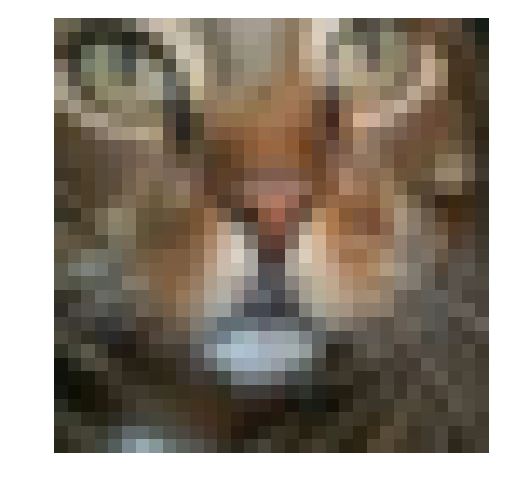

In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np

# Change batch_id(1-5), sample_id to see different images
batch_id = 2
sample_id = 5
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

# Implement Preprocess Functions

## Normalize

In [6]:
def normalize(x):
    return np.array(x / np.max(x))

# DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
tests.test_normalize(normalize)

Tests Passed


## One-hot encode

In [7]:
def one_hot_encode(x):
    return np.eye(10)[x]

# DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
tests.test_one_hot_encode(one_hot_encode)

Tests Passed


## Preprocess all the data and save it
Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation.

In [8]:
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

# Check Point
This is your first checkpoint.  If you ever decide to come back to this notebook or have to restart the notebook, you can start from here.  The preprocessed data has been saved to disk.

In [9]:
import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

# Build the network

## Input

In [10]:
import tensorflow as tf

def neural_net_image_input(image_shape):
    image = tf.placeholder(tf.float32, [None, image_shape[0], image_shape[1], image_shape[2]], name='x')
    return image 

def neural_net_label_input(n_classes):
    label = tf.placeholder(tf.float32, [None, n_classes], name='y')
    return label

def neural_net_keep_prob_input():
    keep_prob = tf.placeholder(tf.float32, name="keep_prob" )
    return keep_prob

# DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


## Convolution and Max Pooling Layer

In [11]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    conv_layer = tf.layers.conv2d(x_tensor, conv_num_outputs, kernel_size=conv_ksize, strides=conv_strides, activation=tf.nn.relu)   
    conv_layer = tf.layers.max_pooling2d(conv_layer, pool_size=pool_ksize, strides=pool_strides)
    return conv_layer 

# DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
tests.test_con_pool(conv2d_maxpool)

Tests Passed


## Flatten Layer

In [12]:
def flatten(x_tensor):
    return tf.layers.flatten(x_tensor)

# DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
tests.test_flatten(flatten)

Tests Passed


## Fully-Connected Layer

In [13]:
def fully_conn(x_tensor, num_outputs):
    return tf.layers.dense(x_tensor, num_outputs, activation=tf.nn.relu)

# DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
tests.test_fully_conn(fully_conn)

Tests Passed


## Output Layer

In [14]:
def output(x_tensor, num_outputs):
    return tf.layers.dense(x_tensor, num_outputs, activation=None)

# DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
tests.test_output(output)

Tests Passed


## Create Convolutional Model

In [15]:
def conv_net(x, keep_prob):
    conv_ksize = (3,3)
    conv_strides = (1,1)
    pool_ksize = (2,2)
    pool_strides = (2,2)
    n_filters_1 = 64
    n_filters_2 = 128
    
    conv_1 = conv2d_maxpool(x, n_filters_1, conv_ksize, conv_strides, pool_ksize, pool_strides)
    conv_2 = conv2d_maxpool(conv_1, n_filters_1, conv_ksize, conv_strides, pool_ksize, pool_strides)

    fc = flatten(conv_2)
    fc1 = fully_conn(fc, 300)    
    # apply dropout
    fc2 = tf.nn.dropout(fc1, keep_prob=keep_prob)
    out = output(fc2, 10)
    return out

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model output (Haven't gone through softmax function, the value are often called logits)
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



## Train the Neural Network

In [16]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    session.run(optimizer, feed_dict={
    x: feature_batch,
    y: label_batch,
    keep_prob: keep_probability})

# DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
tests.test_train_nn(train_neural_network)

Tests Passed


## Show Stats

In [17]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    loss = session.run(cost, feed_dict = {
            x: feature_batch,
            y: label_batch,
            keep_prob: 1.
        })
    valid_acc = session.run(accuracy, feed_dict = {
            x: valid_features,
            y: valid_labels,
            keep_prob: 1.
        })
    print('Epoch {:>2}'
          'Loss: {:>10.4f} Validation Accuracy: {:.6f}'.format(
        epoch + 1,
        loss,
        valid_acc))

### Hyperparameters
Tune the following parameters:
* Set `epochs` to the number of iterations until the network stops learning or start overfitting
* Set `batch_size` to the highest number that your machine has memory for.  Most people set them to common sizes of memory:
 * 64
 * 128
 * 256
 * ...
* Set `keep_probability` to the probability of keeping a node using dropout

In [15]:
# Tune Parameters
epochs = 50
batch_size = 128
keep_probability = 0.5

### Train on a Single CIFAR-10 Batch
Instead of training the neural network on all the CIFAR-10 batches of data, let's use a single batch. This should save time while you iterate on the model to get a better accuracy.  Once the final validation accuracy is 50% or greater, run the model on all the data in the next section.

In [16]:
# DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE

print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
Epoch  1, CIFAR-10 Batch 1:  Epoch  1Loss:     1.9932 Validation Accuracy: 0.359000
Epoch  2, CIFAR-10 Batch 1:  Epoch  2Loss:     1.8194 Validation Accuracy: 0.444400
Epoch  3, CIFAR-10 Batch 1:  Epoch  3Loss:     1.5770 Validation Accuracy: 0.475000
Epoch  4, CIFAR-10 Batch 1:  Epoch  4Loss:     1.3739 Validation Accuracy: 0.518800
Epoch  5, CIFAR-10 Batch 1:  Epoch  5Loss:     1.1773 Validation Accuracy: 0.537800
Epoch  6, CIFAR-10 Batch 1:  Epoch  6Loss:     1.0681 Validation Accuracy: 0.551600
Epoch  7, CIFAR-10 Batch 1:  Epoch  7Loss:     0.9439 Validation Accuracy: 0.563800
Epoch  8, CIFAR-10 Batch 1:  Epoch  8Loss:     0.8497 Validation Accuracy: 0.561000
Epoch  9, CIFAR-10 Batch 1:  Epoch  9Loss:     0.7683 Validation Accuracy: 0.577200
Epoch 10, CIFAR-10 Batch 1:  Epoch 10Loss:     0.6971 Validation Accuracy: 0.567000
Epoch 11, CIFAR-10 Batch 1:  Epoch 11Loss:     0.6348 Validation Accuracy: 0.582400
Epoch 12, CIFAR-10 Batch 1:  Epoc

### Fully Train the Model
Now that you got a good accuracy with a single CIFAR-10 batch, try it with all five batches.

In [157]:
# DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
save_model_path = './image_classification'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epoch  1, CIFAR-10 Batch 1:  Epoch  1Loss:     2.0252 Validation Accuracy: 0.390400
Epoch  1, CIFAR-10 Batch 2:  Epoch  1Loss:     1.6370 Validation Accuracy: 0.446600
Epoch  1, CIFAR-10 Batch 3:  Epoch  1Loss:     1.2542 Validation Accuracy: 0.471000
Epoch  1, CIFAR-10 Batch 4:  Epoch  1Loss:     1.3921 Validation Accuracy: 0.510600
Epoch  1, CIFAR-10 Batch 5:  Epoch  1Loss:     1.3474 Validation Accuracy: 0.524000
Epoch  2, CIFAR-10 Batch 1:  Epoch  2Loss:     1.4600 Validation Accuracy: 0.552000
Epoch  2, CIFAR-10 Batch 2:  Epoch  2Loss:     1.2260 Validation Accuracy: 0.537800
Epoch  2, CIFAR-10 Batch 3:  Epoch  2Loss:     0.9477 Validation Accuracy: 0.558400
Epoch  2, CIFAR-10 Batch 4:  Epoch  2Loss:     1.1335 Validation Accuracy: 0.584000
Epoch  2, CIFAR-10 Batch 5:  Epoch  2Loss:     1.1521 Validation Accuracy: 0.586000
Epoch  3, CIFAR-10 Batch 1:  Epoch  3Loss:     1.1363 Validation Accuracy: 0.604600
Epoch  3, CIFAR-10 Batch 2:  Epoch  3Loss:     0.9857 Validation

# Checkpoint
The model has been saved to disk.
## Test Model
Test your model against the test dataset.  This will be your final accuracy. You should have an accuracy greater than 50%. If you don't, keep tweaking the model architecture and parameters.

INFO:tensorflow:Restoring parameters from ./image_classification
Testing Accuracy: 0.708564082278481



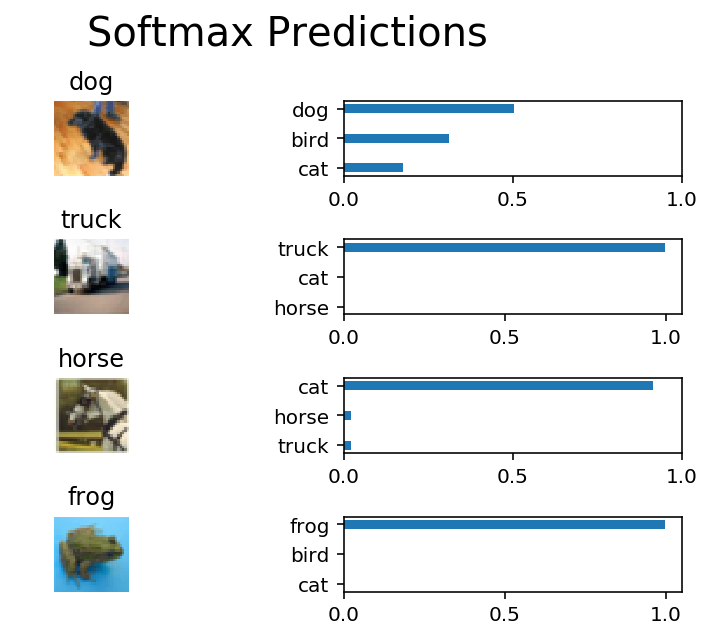

In [158]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_test.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for train_feature_batch, train_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: train_feature_batch, loaded_y: train_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

## Why 50-80% Accuracy?
You might be wondering why you can't get an accuracy any higher. First things first, 50% isn't bad for a simple CNN.  Pure guessing would get you 10% accuracy. However, you might follow the CNN stucture where people are getting scores [well above 80%](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130).

## After training, please delete image with the following code. Otherwise, it will eat a lot of memory space...

In [2]:
!rm cifar-10-python.tar.gz
!rm preprocess_batch_1.p
!rm preprocess_batch_2.p
!rm preprocess_batch_3.p
!rm preprocess_batch_4.p
!rm preprocess_batch_5.p
!rm preprocess_validation.p
!rm preprocess_test.p